In [50]:
import pandas as pd
import json

properties_df = pd.read_json('data/property_listings.json')
properties_df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             337 non-null    int64 
 1   page           337 non-null    int64 
 2   location       337 non-null    object
 3   neighborhood   337 non-null    object
 4   area           337 non-null    object
 5   price          337 non-null    object
 6   fee            337 non-null    object
 7   bedrooms       337 non-null    object
 8   bathrooms      337 non-null    object
 9   parking_spots  337 non-null    object
 10  description    337 non-null    object
 11  url            337 non-null    object
dtypes: int64(2), object(10)
memory usage: 31.7+ KB


### Addition of Data for Intent Classifier
The following two cells add new data to the train and test set of the intent classifier. This data comes from a file called 'new_contact_agent.csv'

In [65]:
contact_agent_df = pd.read_csv('data/contact_agent_dataset.csv')
test_contact_agent_df = pd.read_csv('data/test_contact_agent.csv')
new_data = pd.read_csv('data/new_contact_agent.csv')
new_data.describe()

# Calculate the split index for an 80/20 train/test splits
split_index = round(new_data.shape[0] * 0.8)


566

In [422]:
new_contact_agent = new_data[new_data['label'] == 'contact agent']
new_other = new_data[new_data['label'] == 'other']

contact_agent_df = pd.merge(contact_agent_df, new_contact_agent[:split_index], how='outer')
contact_agent_df = pd.merge(contact_agent_df, new_other[:split_index], how='outer')
contact_agent_df = contact_agent_df.drop_duplicates()

test_contact_agent_df = pd.merge(test_contact_agent_df, new_contact_agent[split_index:], how='outer')
test_contact_agent_df = pd.merge(test_contact_agent_df, new_other[split_index:], how='outer')
test_contact_agent_df = test_contact_agent_df.drop_duplicates()

contact_agent_df.to_csv('data/contact_agent_dataset_2.csv', index=False)
test_contact_agent_df.to_csv('data/test_contact_agent_2.csv', index=False)

### Training Analysis of Roberta model

EPOCHS:  [0.28169014084507044, 0.5633802816901409, 0.8450704225352113, 1.1267605633802817, 1.408450704225352, 1.6901408450704225, 1.971830985915493, 2.2535211267605635, 2.535211267605634, 2.816901408450704, 3.0985915492957745, 3.380281690140845, 3.6619718309859155, 3.943661971830986, 4.225352112676056, 4.507042253521127, 4.788732394366197, 5.0]


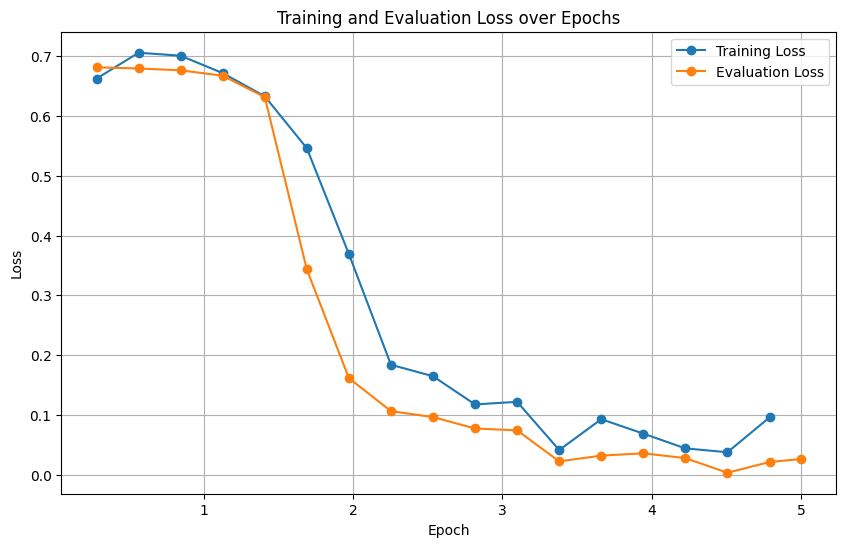

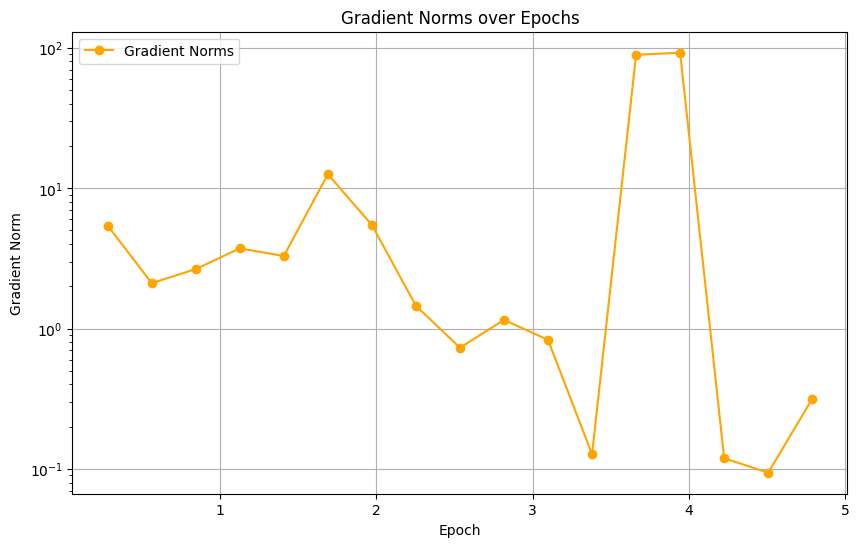

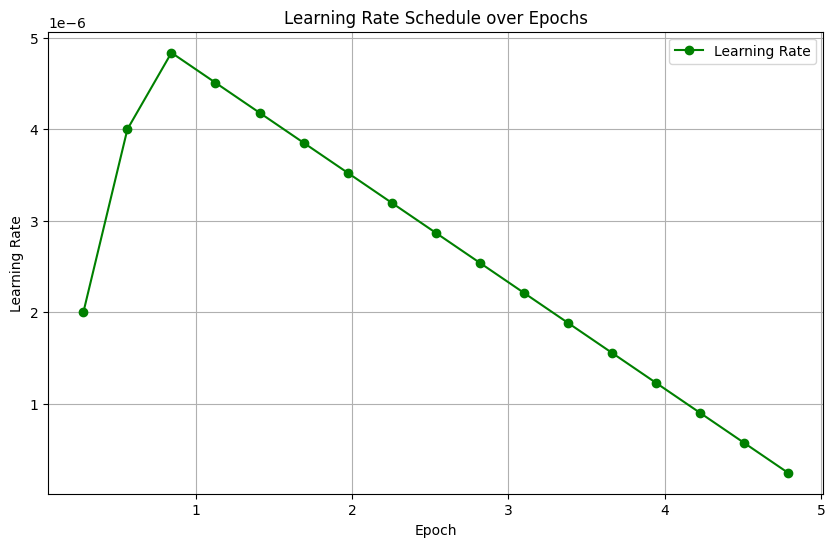

In [441]:
import os
import json
import matplotlib.pyplot as plt

# Define the directory where the model and training logs are saved
output_dir = './results/model-6'

# Load the training history from the 'trainer_state.json' file
trainer_state_file = os.path.join(output_dir, 'log_history.json')
with open(trainer_state_file, 'r') as f:
    log_history = json.load(f)

# Initialize lists to store extracted data
epochs = []
train_loss = []
eval_loss = []
learning_rate = []
grad_norms = []

# Loop over the log history to extract training metrics
for entry in log_history:
    if 'loss' in entry:
        train_loss.append(entry['loss'])
    if 'eval_loss' in entry and 'epoch' in entry:
        epochs.append(entry['epoch'])
        eval_loss.append(entry['eval_loss'])
    if 'learning_rate' in entry:
        learning_rate.append(entry['learning_rate'])
    if 'grad_norm' in entry:
        grad_norms.append(entry['grad_norm'])
print('EPOCHS: ', epochs)

# Plot Training and Evaluation Loss over Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs[:len(train_loss)], train_loss, label='Training Loss', marker='o')
plt.plot(epochs[:len(eval_loss)], eval_loss, label='Evaluation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gradient Norms over Epochs
if len(grad_norms) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs[:len(grad_norms)], grad_norms, label='Gradient Norms', marker='o', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient Norm')
    plt.title('Gradient Norms over Epochs')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Learning Rate over Epochs
if len(learning_rate) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs[:len(learning_rate)], learning_rate, label='Learning Rate', marker='o', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

